In [1]:
'''
README
# python 3.8
# coding: utf-8
# main script for /modelers
'''

#########################################################################################
'''
References
# Model averaging: 
* https://machinelearningmastery.com/weighted-average-ensemble-for-deep-learning-neural-networks/
# Activations: 
* https://github.com/siebenrock/activation-functions
* https://www.v7labs.com/blog/neural-networks-activation-functions
# XAI:
* https://towardsdatascience.com/deep-learning-model-interpretation-using-shap -a21786e91d16
'''
#########################################################################################

'\nReferences\n# Model averaging: \n* https://machinelearningmastery.com/weighted-average-ensemble-for-deep-learning-neural-networks/\n# Activations: \n* https://github.com/siebenrock/activation-functions\n* https://www.v7labs.com/blog/neural-networks-activation-functions\n# XAI:\n* https://towardsdatascience.com/deep-learning-model-interpretation-using-shap -a21786e91d16\n'

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, Flatten, BatchNormalization, 
    Conv2D, MaxPooling2D, GlobalAveragePooling2D,
    Activation)
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import backend as K
import numpy as np

# Settings
kernel_size = (1,3)

# Knife
def shaper(Xs):            
    X_train, X_valid, X_test = Xs
    print('in Xs:', X_train.shape, X_valid.shape, X_test.shape)
    
    # Scale (for 3D shaped X)            
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_valid = scaler.transform(X_valid.reshape(-1, X_valid.shape[-1])).reshape(X_valid.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    rows, cols = X_train.shape[1], X_train.shape[2]    
    input_shape = (rows, cols, 1) 

    X_train = X_train.reshape(X_train.shape + (1,)).astype('float32')
    X_valid = X_valid.reshape(X_valid.shape + (1,)).astype('float32')
    X_test = X_test.reshape(X_test.shape + (1,)).astype('float32')
    
    Xs_out = (X_train, X_valid, X_test)
    return Xs_out, input_shape
            
def bsdcnn_relu(Xs, learning_rate, batch_size):  
    print('Initiated bsdcnn.py...')
    
    # plastic surgery
    Xs_out, input_shape = shaper(Xs)    
    
    # pick 1 model
    model = b1_mlp(input_shape, batch_size)
    
    opt_adam = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    model.compile(loss='binary_crossentropy', 
                  optimizer=opt_adam, 
                  metrics=['binary_accuracy'],
                 )
    
    return Xs_out, model 

#################################################################################
## Builds

def b1_bsdcnn(input_shape, batch_size):
    # https://www.researchgate.net/publication/349293613_Binary_Single-Dimensional_Convolutional_Neural_Network_for_Seizure_Prediction
    model = Sequential()
    
    model.add(Conv2D(16, (1,5), activation='relu',input_shape=input_shape))
    model.add(Conv2D(16, (1,5), strides=2, activation='relu',padding="valid"))
    model.add(BatchNormalization())  
    
    model.add(Conv2D(32, (1,5), padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (1,5), strides=2, padding="same", activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (1,10), padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (1,10), strides=2, padding="same", activation='relu'))
    model.add(BatchNormalization())   
    
    model.add(Conv2D(128, (2,1), padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (2,1), strides=2 ,padding="same", activation='relu'))
    model.add(BatchNormalization())  
    
    model.add(Conv2D(256, (2,1), padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (2,1), strides=2, padding="same", activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, Flatten, BatchNormalization, 
    Conv2D, MaxPooling2D, GlobalAveragePooling2D,
    Activation)
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import backend as K
import numpy as np

# Settings
kernel_size = (1,3)

# Knife
def shaper(Xs):            
    X_train, X_valid, X_test = Xs
    print('in Xs:', X_train.shape, X_valid.shape, X_test.shape)
    
    # Scale (for 3D shaped X)            
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_valid = scaler.transform(X_valid.reshape(-1, X_valid.shape[-1])).reshape(X_valid.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    rows, cols = X_train.shape[1], X_train.shape[2]    
    input_shape = (rows, cols, 1) 

    X_train = X_train.reshape(X_train.shape + (1,)).astype('float32')
    X_valid = X_valid.reshape(X_valid.shape + (1,)).astype('float32')
    X_test = X_test.reshape(X_test.shape + (1,)).astype('float32')
    
    Xs_out = (X_train, X_valid, X_test)
    return Xs_out, input_shape
            
def mlp(Xs, learning_rate, batch_size):  
    print('Initiated bsdcnn.py...')
    
    # plastic surgery
    Xs_out, input_shape = shaper(Xs)    
    
    # pick 1 model
    model = b1_mlp(input_shape, batch_size)
    
    opt_adam = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    model.compile(loss='binary_crossentropy', 
                  optimizer=opt_adam, 
                  metrics=['binary_accuracy'],
                 )
    
    return Xs_out, model 

#################################################################################
## Builds

def b1_mlp(input_shape, batch_size):
    # https://www.researchgate.net/publication/349293613_Binary_Single-Dimensional_Convolutional_Neural_Network_for_Seizure_Prediction
    model = Sequential()
    
    model.add(Dense(batch_size, input_dim=input_shape, activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(batch_size*4, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(batch_size, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(batch_size/4, activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.utils import plot_model, to_categorical # unused aon
from tensorflow.keras.metrics import *

#from keras_visualizer import visualizer
#from model_profiler import model_profiler

import shap

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from numba import cuda
import os, random, copy, warnings, math, time, csv
from pathlib import Path
from contextlib import redirect_stdout

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#########################################################################################

/opt/anaconda3/envs/eeg/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# paths
arr_dir = '/home/SharedFiles/Projects/EEG/Inputs/seq_arr/'
outputs_dir = '/home/SharedFiles/Projects/EEG/Outputs/runs'

#########################################################################################
# Models ### CHECKER
engine_names = ('BSDCNN_relu',) #('CNN1Db2', 'CNN2Db1', 'BSDCNNb1')
engines = (bsdcnn_relu,) #(cnn1d, cnn2d, bsdcnn)

# engine_names = ('CNN1Db2', 'CNN2Db1', 'BSDCNNb1') 
# engines = (cnn1d, cnn2d, bsdcnn)

# channel picks  ### CHECKER
ch_picks_list = ('all',) #('rt', 'lt') 

all_ch = ('Fp1-AVG', 'F3-AVG', 'C3-AVG','P3-AVG','Fp2-AVG', 'F4-AVG', 'C4-AVG','P4-AVG','F7-AVG',
              'T1-AVG', 'T3-AVG', 'T5-AVG', 'O1-AVG', 'F8-AVG', 'T2-AVG', 'T4-AVG', 'T6-AVG', 'O2-AVG',
              'Fz-AVG', 'Cz-AVG', 'Pz-AVG') # in order of index!
#ch_picks_list += all_ch

In [5]:
# Global Settings
learning_rate = 1e-5 
batch_size = 64 # CHECKER
epochs = 1 #10** 2 
patience = 10

# Dataset settings
train_ratio = 0.7

# Other settings
scaler = MinMaxScaler()

#########################################################################################

In [6]:
def fetcher(_dir):
    patients, all_preictals, all_interictals = [], [], []
    for patient in os.listdir(_dir):
        if patient.startswith('SNUCH01'): # CHECKER
            #print('patient', patient) # TEST
            patient_pth = os.path.join(_dir, patient)
            patients.append(patient)
            all_preictals.append([])
            all_interictals.append([])
            for ictalType in os.listdir(patient_pth):
                ictalType_pth = os.path.join(patient_pth, ictalType) 
                if os.path.isdir(ictalType_pth):
                    if ictalType == 'preictals':
                        for preictal in os.listdir(ictalType_pth):
                            if not preictal.startswith('.'):
                                preictal_pth = os.path.join(ictalType_pth, preictal)
                                all_preictals[-1].append(preictal_pth)
                    if ictalType == 'interictals':
                        for interictal in os.listdir(ictalType_pth):
                            if not interictal.startswith('.'):
                                interictal_pth = os.path.join(ictalType_pth, interictal)
                                all_interictals[-1].append(interictal_pth)

    print('Num patients:', len(patients))
    print('Cnt equivalency:', len(patients) == len(all_preictals) == len(all_interictals))
    
    # zip and order
    zipper = list(zip(patients, all_preictals, all_interictals))
    zipper = zip(*sorted(zipper, key = lambda x:x[0]))
     
    return tuple(zipper)


# train valid test split

In [7]:
def split_data(preictals, interictals, train_ratio, ch_picks, t):
    # # shape test
    # prime = np.load(preictals[0]).shape
    # print('preictals shape:', prime)
    # print([np.load(ele).shape for ele in preictals if np.load(ele).shape != np.load(preictals[0]).shape])
    # prime = np.load(interictals[0]).shape
    # print('interictals shape:', prime)
    # print([np.load(ele).shape for ele in interictals if np.load(ele).shape != np.load(interictals[0]).shape])
    
    tot_timesteps = 3000 ### hardcoded
    
    if ch_picks == 'all':
        mask = [i for i in range(len(all_ch))] # find alternative
            
#     elif ch_picks == 'rt':
#         rt_ch = ('Fp2-AVG', 'F4-AVG', 'C4-AVG', 'P4-AVG', 'O2-AVG', 'F8-AVG','T4-AVG', 'T6-AVG')
#         mask = [all_ch.index(ch) for ch in rt_ch]
        
#     elif ch_picks == 'lt':
#         lt_ch = ('Fp1-AVG', 'F3-AVG', 'C3-AVG','P3-AVG', 'O1-AVG' ,'F7-AVG', 'T3-AVG', 'T5-AVG')
#         mask = [all_ch.index(ch) for ch in lt_ch]
        
#     else:
#         single_ch = ch_picks
#         print('Single channel:', single_ch)
#         print('Single channel:', single_ch, file=t)
#         mask = [all_ch.index(single_ch)]
        
        
    X = [np.load(npy)[mask,:tot_timesteps] if np.load(npy).shape[1] >tot_timesteps else np.load(npy)[mask,:] for npy in preictals] + \
        [np.load(npy)[mask,:tot_timesteps] if np.load(npy).shape[1] >tot_timesteps else np.load(npy)[mask,:] for npy in interictals]   
    y = [1. for it in preictals] + [0. for it in interictals]
    
    data = list(zip(X, y))
    random.shuffle(data)
    
    train_size = int(len(data) * train_ratio)
    valid_size = int((len(data) - train_size) / 2) # 1:1 = valid:test
    valid_ind = train_size + valid_size
    
    train = data[:train_size]
    valid = data[train_size:valid_ind]
    test = data[valid_ind:]
    
    X_train, y_train = zip(*train)
    X_valid, y_valid = zip(*valid)
    X_test, y_test = zip(*test)
              
    return np.array(X_train, dtype=np.float32), np.array(y_train), np.array(X_valid, dtype=np.float32), np.array(y_valid), np.array(X_test, dtype=np.float32), np.array(y_test)

In [8]:
class PerformanceVisualizationCallback(Callback):
    def __init__(self, model, validation_data, image_dir):
        super().__init__()
        self.model = model
        self.validation_data = validation_data
        
        os.makedirs(image_dir, exist_ok=True)
        self.image_dir = image_dir

    def on_epoch_end(self, epoch, logs={}):
        y_pred = np.asarray(self.model.predict(self.validation_data[0]))
        y_true = self.validation_data[1]             
        y_pred_class = np.argmax(y_pred, axis=1)

        # plot and save confusion matrix
        fig, ax = plt.subplots(figsize=(16,12))
        plot_confusion_matrix(y_true, y_pred_class, ax=ax)
        # fig.savefig(os.path.join(self.image_dir, f'confusion_matrix_epoch_{epoch}'))

       # plot and save roc curve
        fig, ax = plt.subplots(figsize=(16,12))
        plot_roc(y_true, y_pred, ax=ax)
        # fig.savefig(os.path.join(self.image_dir, f'roc_curve_epoch_{epoch}'))

#########################################################################################

In [9]:
g_model, g_X_train, g_y_train, g_X_test, g_y_test = None,None,None,None,None

In [10]:
def modeler(arr_name, patients, all_preictals, all_interictals, t, cw, run_name, run_dir, engine_name, engine, ch_picks):
    # paths
    image_dir = os.path.join(run_dir, 'visuals')
    model_dir = os.path.join(run_dir, 'models')

    # Multi-GPU Set-up # https://keras.io/guides/distributed_training/
    strategy = tf.distribute.MirroredStrategy() # multi-GPU
    print('Num devices: {}'.format(strategy.num_replicas_in_sync)) # num GPUs
    #print('Patience:', patience)
    #print('Learning rate:', learning_rate)
    print('Batch size:', batch_size)

    print()
    print('-' * 65)

    # all auc plot
    plt.figure(2)
    plt.title('Model AUC (All Patients)')
    plt.axis([0,1,0,1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')

    all_auc_keras, all_loss, all_acc = [], [], []

    for idx, patient in enumerate(patients[:1]): #### CHECKER
        try:
            X_train, y_train, X_valid, y_valid, X_test, y_test = split_data(
                all_preictals[idx], all_interictals[idx], train_ratio, ch_picks, t)



            # y_train = to_categorical(y_train, num_classes) 
            # y_valid = to_categorical(y_valid, num_classes)
            # y_test = to_categorical(y_test, num_classes)

            # Reshape & compile model
            Xs = (X_train, X_valid, X_test) # pack
            with strategy.scope(): # multi-gpu
                Xs_reshaped, model = engine(Xs, learning_rate, batch_size)

            X_train, X_valid, X_test = Xs_reshaped # unpack
            print('out Xs:', X_train.shape, X_valid.shape, X_test.shape)

            if idx == 0:
                model.summary()
                with redirect_stdout(t):
                    model.summary()

            print('_' * 65)
            print(patient)
            print('=' * 65)
            print('Num total sequences:', len(all_preictals[idx]) + len(all_interictals[idx]))

            fname = '{}_{}_{}'.format(engine_name, patient, arr_name)
            fpath = os.path.join(run_dir, 'models', fname)

            early_stopping_monitor = EarlyStopping(
                monitor='binary_accuracy',
                mode='max',
                patience=patience,
                restore_best_weights=True,
            )

            # model_checkpoint_monitor = ModelCheckpoint(
            #     fpath, monitor='loss', verbose=0, 
            #     save_best_only=True, save_weights_only=True, 
            #     mode='auto', save_freq=batch_size*2**4,
            # )

            # performance_cbk = PerformanceVisualizationCallback(
            #       model=model,
            #       validation_data=(X_valid, y_valid),
            #       image_dir=image_dir,
            # )
            # tboard_callback = tf.keras.callbacks.TensorBoard(
            #     log_dir=run_dir,
            #     histogram_freq=1,
            #     update_freq=100
            #     #profile_batch=[16, 32]
            # )

            # Fit model
            hist = model.fit(X_train, y_train, 
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_valid, y_valid),
                  validation_split=0.2,
                  callbacks = [early_stopping_monitor]#, model_checkpoint_monitor]#, tboard_callback],# performance_cbk]
            )

            val_loss, val_acc = model.evaluate(X_valid, y_valid, verbose=1, batch_size=batch_size)
            best_val_loss = min(hist.history['val_loss'])
            best_val_acc = max(hist.history['val_binary_accuracy'])
            all_loss.append(val_loss)
            all_acc.append(val_acc)

            print('Valid loss:', round(val_loss, 4), '|',
                  'Valid accuracy:', round(val_acc,4))
            print('Best valid loss:', round(best_val_loss,4), '|',
                  'Best valid accuracy:', round(best_val_acc,4)) # all accuracy is binary accuracy

            # Check
            y_pred = model.predict(X_test).ravel()
            y_pred_class = np.argmax(y_pred) #necessary for binary?

            nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
            auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
            all_auc_keras.append(auc_keras)
            auc_score = roc_auc_score(y_test,y_pred)
            print('AUC Score:', round(auc_score,4))

            # Outputs
            curr_scores = [patient, round(auc_score,4), round(val_acc,4), round(val_loss,4)]
            # cw.writerow(curr_scores)

            # TEST
            global g_model, g_X_train, g_y_train, g_X_test, g_y_test
            g_model, g_X_train, g_y_train, g_X_test, g_y_test = model, X_train, y_train, X_test, y_test

#             # Visualization
#             # loss, acc plot
#             fig, loss_ax = plt.subplots()
#             acc_ax = loss_ax.twinx()

#             loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
#             loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
#             loss_ax.set_ylim([0,1])

#             acc_ax.plot(hist.history['binary_accuracy'], 'b', label = 'train accuracy')
#             acc_ax.plot(hist.history['val_binary_accuracy'], 'g', label = 'val accuracy')

#             loss_ax.set_xlabel('epoch')
#             loss_ax.set_ylabel('loss')
#             acc_ax.set_ylabel('accuracy')

#             loss_ax.legend(loc = 'upper left')
#             acc_ax.legend(loc = 'lower left')

#             fname = patient + '_loss_acc_' + run_name + '.png'
#             fpath = os.path.join(image_dir, fname)
#             fig.savefig(fpath)
#             plt.clf()

            # # auc plot (all)
            # plt.figure(2) # all patients
            # plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='{} (auc = {})'.format(patient, round(auc_keras,4)) )
            
#             print()
          

 

     # plot & visualize model summary 
            # if patient == 'SNUCH01' and ch_picks=='all':
            #     fname = run_name + '.png'
            #     fpath = os.path.join(image_dir, fname)
                #plot_model(model, to_file=fpath, show_shapes=True, show_layer_names=True) # CHECKER
            
                # # keras-visualizer
                # fname = engine_name + '_' + run_name + '_graphics.png'
                # fpath = os.path.join(image_dir, fname)
                # visualizer(model, filename=fpath, format='png', view=False)
            
            # ## XAI (structured: channels)
            # # shap plot issues: https://github.com/slundberg/shap/issues/153
            # # compute SHAP values
            # explainer = shap.DeepExplainer(model, X_train)
            # shap_values = explainer.shap_values(X_test)
            # print('======shap_values shape:', shap_values.shape)
            
            
#             # SHAP Global Interpretation
#             plt.figure(10)
#             shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = all_ch, 
#                               show=False, matplotlib=True)
#             fname = 'shap_global_' + run_name + '.png'
#             fpath = os.path.join(image_dir, fname)
#             plt.savefig(fpath, format = "png", dpi=150, bbox_inches='tight')
#             plt.clf()
            
#             # SHAP Local Interpretation
# #             shap.initjs()
# # shap.force_plot(explainer.expected_value[0].np(), shap_values[0][0], features = all_ch)

# #             shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = test_data.iloc[0,:], feature_names = all_ch)
    
# #             shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = all_ch)
            
#             ## XAI (unstructured)
            
    
                       
#             # # Profiler
#             # model = ct.convert(model)
#             # profile = model_profiler(model, batch_size) # measure model profile
#             # print(profile)
#             # print(profile, file=t)

#             # Clear mem
#             del model
#             tf.keras.backend.clear_session() # may not work. Safety catch with cuda.close() in main()
            
            
        
        except ValueError:
            raise # TEST # CHECKER
            
#             # print('Error with {}, skipping...'.format(patient) )
#             # print('Error with {}, skipping...'.format(patient), file=t)
#             # continue

#     print('_' * 65)

    # avg_auc_keras = np.mean(all_auc_keras)
    # print("Avg. auc for all patients:", round(avg_auc_keras,4))
    # print("Avg. acc for all patients:",  round(np.mean(all_acc),4))
    # avg_scores = ['Avg', round(avg_auc_keras,4), round(np.mean(all_acc),4), round(np.mean(all_loss),4)]
    # cw.writerow(avg_scores)
    
    # plt.figure(2) # all auc plot
    # plt.legend(loc='best')
    # fname = 'all_auc' + run_name + '.png'
    # fpath = os.path.join(image_dir, fname)
    # plt.savefig(fpath)
    # plt.clf()
    
    
    


_________________________________________________________________
Dataset: seg05m_seq30s

20220503_143959_BSDCNN_relu_seg05m_seq30s_all
Num patients: 1
Cnt equivalency: True
Num devices: 2
Batch size: 64

-----------------------------------------------------------------
Initiated bsdcnn.py...
in Xs: (3697, 21, 3000) (792, 21, 3000) (793, 21, 3000)


TypeError: Error converting shape to a TensorShape: Dimension value must be integer or None or have an __index__ method, got (21, 3000, 1).

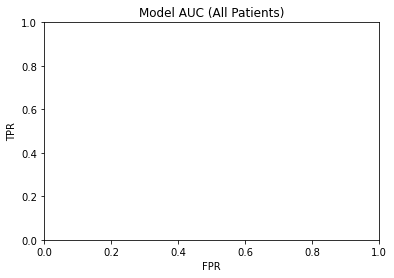

In [11]:
def ignition(arr_name, run_name, run_dir, engine_name, engine, ch_picks):
    os.makedirs(run_dir, exist_ok=False)
    t = open(os.path.join(run_dir, 'model_run_' + run_name + '.txt'), 'w')
    c = open(os.path.join(run_dir, 'model_scores_' + run_name + '.csv'), 'w')
    cw = csv.writer(c)
    header = ['patient', 'auc', 'acc', 'loss']
    cw.writerow(run_name.split('_'))
    cw.writerow(header)

    print(run_name)
    print(run_name, file=t)
    patients, all_preictals, all_interictals = fetcher(os.path.join(arr_dir, arr_name))
    #print(*map(len, [patients, all_preictals, all_interictals])) # test
    modeler(arr_name, patients, all_preictals, all_interictals, t, cw, run_name, run_dir, engine_name, engine, ch_picks)
    print('\n\n')

    t.close()
    c.close()

def main():
    cuda.close() # clear VRAM
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    
    for arr_name in os.listdir(arr_dir): # for all datasets (of differing seg_len, if any)
        # filter out ghosts, and pick desired dataset:
        if not arr_name.startswith('.') and 'seg05m' in arr_name:
            print()
            print('_' * 65)
            print('=' * 65)
            print('Dataset:', arr_name)
            print('=' * 65)
            print()
            
            for engine_name, engine in zip(engine_names, engines):   
                for ch_picks in ch_picks_list:
                    run_name = timestamp + '_' + engine_name + '_' + arr_name + '_' + ch_picks
                    run_dir = os.path.join(outputs_dir, run_name)
                    ignition(arr_name, run_name, run_dir, engine_name, engine, ch_picks)
                    print()
                print()
            print()
                    
    ## clear VRAM 
    #cuda.close()
    
    # cuda.select_device(0)
    # cuda.close()
    # cuda.select_device(1)
    # cuda.close()
    

#########################################################################################
main() # call main
# penultimate line

In [12]:
input_shape

NameError: name 'input_shape' is not defined

In [ ]:
g_X_train.shape

In [ ]:
g_model.layers[-1]

In [ ]:
# https://towardsdatascience.com/deep-learning-model-interpretation-using-shap-a21786e91d16

In [ ]:
# # class label list
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']
# # example image for each class
# images_dict = dict()
# for i, l in enumerate(y_train):
#   if len(images_dict)==10:
#     break
#   if l not in images_dict.keys():
#     images_dict[l] = x_train[i].reshape((32, 32,3))
# images_dict = dict(sorted(images_dict.items()))
    
# # example image for each class for test set
# x_test_dict = dict()
# for i, l in enumerate(y_test):
#   if len(x_test_dict)==10:
#     break
#   if l not in x_test_dict.keys():
#     x_test_dict[l] = x_test[i]
    
# # order by class
# x_test_each_class = [x_test_dict[i] for i in sorted(x_test_dict)]
# x_test_each_class = np.asarray(x_test_each_class)

# # Compute predictions
# predictions = model.predict(x_test_each_class)
# predicted_class = np.argmax(predictions, axis=1)

In [ ]:
## SHAP image interpretation
# set up to pass through BatchNorm
shap.explainers._deep.deep_tf.op_handlers["AddV3"] = shap.explainers._deep.deep_tf.passthrough
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

# select backgroud for shap
background = g_X_train[np.random.choice(g_X_train.shape[0], 1000, replace=False)]

# DeepExplainer to explain predictions of the model
explainer = shap.DeepExplainer(g_model, background)

# compute shap values
shap_values = explainer.shap_values(g_X_test[:10])

In [ ]:
g_X_test.shape

In [ ]:
g_y_test[102]

In [ ]:
# compute SHAP values
explainer = shap.DeepExplainer((g_model.layers[0].input, g_model.layers[-1].output), g_X_train[:100])
shap_values = explainer.shap_values(g_X_test[:10])


In [ ]:
explainer.shape

In [ ]:
# # SHAP Global Interpretation
# plt.figure(10)
# shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = all_ch, 
#                   show=False, matplotlib=True)
# fname = 'shap_global_' + run_name + '.png'
# fpath = os.path.join(image_dir, fname)
# plt.savefig(fpath, format = "png", dpi=150, bbox_inches='tight')
# plt.clf()

# # SHAP Local Interpretation
# #             shap.initjs()
# # shap.force_plot(explainer.expected_value[0].np(), shap_values[0][0], features = all_ch)

# #             shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = test_data.iloc[0,:], feature_names = all_ch)

# #             shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = all_ch)

# ## XAI (unstructured)



# # # Profiler
# # model = ct.convert(model)
# # profile = model_profiler(model, batch_size) # measure model profile
# # print(profile)
# # print(profile, file=t)